In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [19]:
houst = pd.read_csv('data/HOUST.csv')


In [20]:
houst

,DATE,HOUST
0,1/1/1959,1657
1,1/2/1959,1667
2,1/3/1959,1620
3,1/4/1959,1590
4,1/5/1959,1498
...,...,...
775,1/8/2023,1305
776,1/9/2023,1356
777,1/10/2023,1376
778,1/11/2023,1525


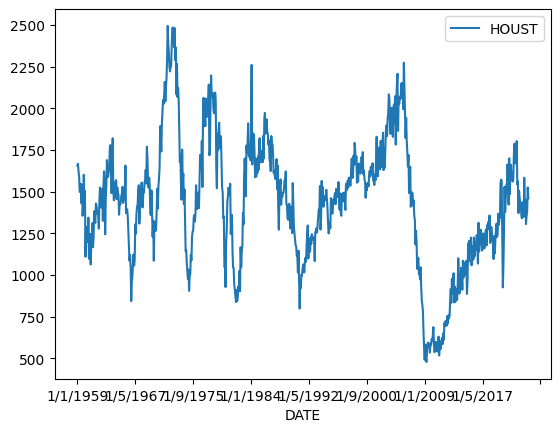

In [83]:
houst.plot()
pyplot.show()

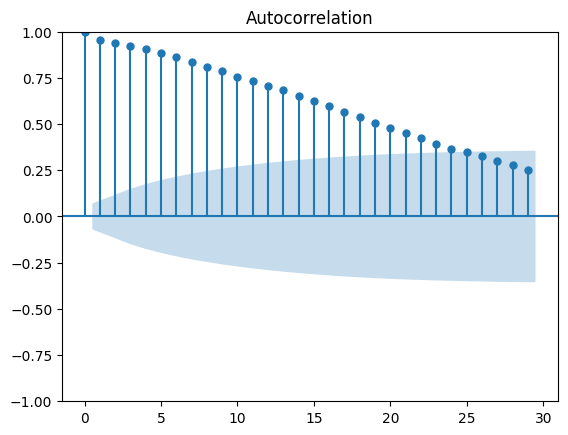

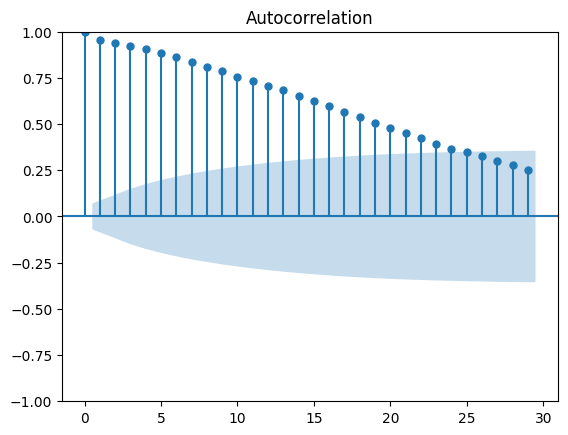

In [84]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(houst.HOUST)

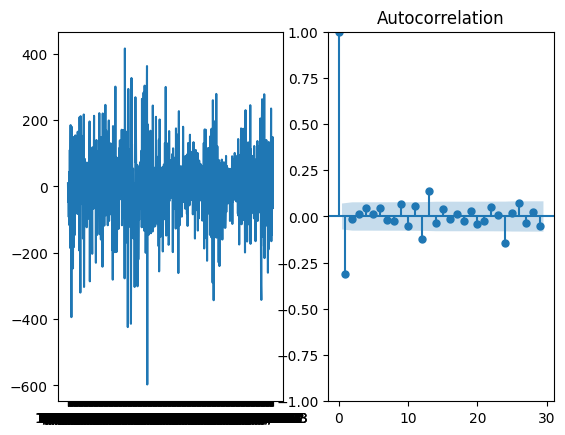

In [85]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.plot(houst.HOUST.diff())

ax2 = f.add_subplot(122)
plot_acf(houst.HOUST.diff().dropna(), ax=ax2)
plt.show()

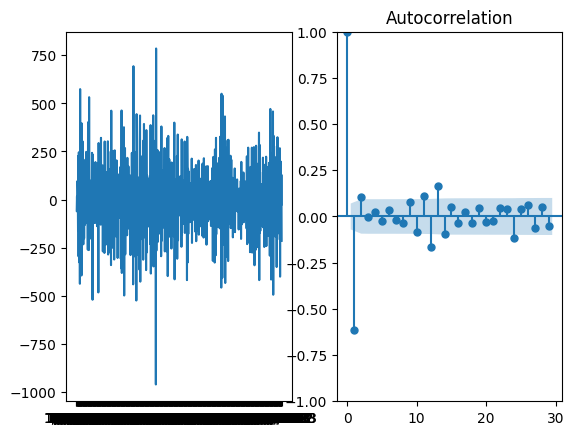

In [86]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.plot(houst.HOUST.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(houst.HOUST.diff().diff().dropna(), ax=ax2)
plt.show()

In [87]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(houst.HOUST.dropna())
print(f"p-value: {result[1]}")

result = adfuller(houst.HOUST.diff().dropna())
print(f"p-value: {result[1]}")

result = adfuller(houst.HOUST.diff().diff().dropna())
print(f"p-value: {result[1]}")

p-value: 0.0028826580293683057
p-value: 2.4827832192593595e-10
p-value: 4.293943021057209e-23


In [88]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(houst.HOUST, order = (1,1,1))
model_fit = arima_model.fit()


C:\Users\uifan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\uifan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\uifan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

Test RMSE 75.7220658841236


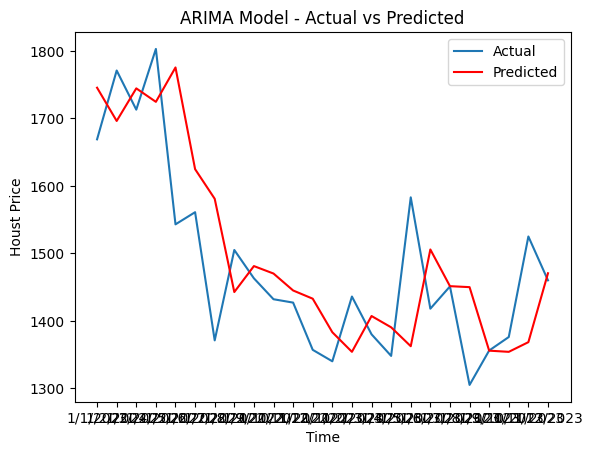

In [89]:
from matplotlib import pyplot
from math import sqrt
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have a DataFrame named houst
# Example DataFrame
# houst = ...

train, test = houst[:-24], houst[-24:]
history = [x for x in train.HOUST]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test.HOUST[t]
    history.append(obs)

mae = mean_absolute_error(test.HOUST, predictions)
print(f"Test RMSE {mae}")

# Plotting with labels
pyplot.plot(test, label='Actual')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.xlabel('Time')
pyplot.ylabel('Houst Price')
pyplot.title('ARIMA Model - Actual vs Predicted')
pyplot.legend()
pyplot.show()


In [172]:
from matplotlib import pyplot
from math import sqrt
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have a DataFrame named houst
# Example DataFrame
# houst = ...

history = [x for x in houst.HOUST]
predictions = list()

for t in range(12):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(yhat)

In [173]:
predictions

[1465.3783526922882,
 1465.3851303832414,
 1465.383793162544,
 1465.383886008769,
 1465.3838870036172,
 1465.3838872060853,
 1465.3838882286873,
 1465.3838881977856,
 1465.383888200381,
 1465.3838882007615,
 1465.3838882008965,
 1465.383888200938]

## xgboost

In [57]:
import os
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from decompose import decompose

# Chart drawing
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [25]:
import pandas as pd

# Load the Excel file
file_path = 'data/mortgage_data.xlsx'
sheet_name = 'full history'
df = pd.read_excel(file_path, sheet_name=sheet_name, header=None)

# Extract the specified range of rows (1078th to 2766th) and columns (B to D)
start_row, end_row = 1077, 2766
start_col, end_col = 3, 4 # B to D columns
additional_col = 7  # G column

# Select the desired columnsa
mortgage_df = df.iloc[start_row-1:end_row, [start_col-1, additional_col-1, end_col-1]]

# Rename columns
mortgage_df.columns = ['day', '30_year_fixed', '15_year_fixed']
mortgage_df['30_year_fixed'] = pd.to_numeric(mortgage_df['30_year_fixed'], errors='coerce').astype(float)
mortgage_df['15_year_fixed'] = pd.to_numeric(mortgage_df['15_year_fixed'], errors='coerce').astype(float)

In [70]:
houst = pd.read_csv('data/HOUST.csv')

In [27]:
houst

,DATE,HOUST
0,1/1/1959,1657
1,1/2/1959,1667
2,1/3/1959,1620
3,1/4/1959,1590
4,1/5/1959,1498
...,...,...
775,1/8/2023,1305
776,1/9/2023,1356
777,1/10/2023,1376
778,1/11/2023,1525


In [71]:
mortgage_df.rename(columns={'day': 'date'}, inplace=True)
houst.rename(columns={'DATE': 'date'}, inplace=True)

In [72]:
houst['date'] = pd.to_datetime(houst['date'], format='%d/%m/%Y')
mortgage_df['date'] = pd.to_datetime(mortgage_df['date'])

In [30]:
houst

,date,HOUST
0,1959-01-01,1657
1,1959-02-01,1667
2,1959-03-01,1620
3,1959-04-01,1590
4,1959-05-01,1498
...,...,...
775,2023-08-01,1305
776,2023-09-01,1356
777,2023-10-01,1376
778,2023-11-01,1525


In [31]:
mortgage_df

,date,30_year_fixed,15_year_fixed
1076,1991-08-30,8.77,9.15
1077,1991-09-06,8.79,9.14
1078,1991-09-13,8.68,9.02
1079,1991-09-20,8.62,8.95
1080,1991-09-27,8.59,8.92
...,...,...,...
2761,2023-12-15,6.38,6.95
2762,2023-12-22,5.95,6.67
2763,2023-12-29,5.93,6.61
2764,2024-01-05,5.89,6.62


In [32]:
merged_df = pd.merge_asof(houst.sort_values('date'), mortgage_df.sort_values('date'), on='date', direction='backward')

# Display the resulting DataFrame
merged_df

,date,HOUST,30_year_fixed,15_year_fixed
0,1959-01-01,1657,NaN,NaN
1,1959-02-01,1667,NaN,NaN
2,1959-03-01,1620,NaN,NaN
3,1959-04-01,1590,NaN,NaN
4,1959-05-01,1498,NaN,NaN
...,...,...,...,...
775,2023-08-01,1305,6.11,6.81
776,2023-09-01,1356,6.55,7.18
777,2023-10-01,1376,6.72,7.31
778,2023-11-01,1525,7.03,7.79


In [73]:
merged_df = houst

In [33]:
merged_df = merged_df.dropna()

In [34]:
merged_df

,date,HOUST,30_year_fixed,15_year_fixed
392,1991-09-01,1015,8.77,9.15
393,1991-10-01,1079,8.59,8.92
394,1991-11-01,1103,8.41,8.78
395,1991-12-01,1079,8.29,8.70
396,1992-01-01,1176,7.90,8.35
...,...,...,...,...
775,2023-08-01,1305,6.11,6.81
776,2023-09-01,1356,6.55,7.18
777,2023-10-01,1376,6.72,7.31
778,2023-11-01,1525,7.03,7.79


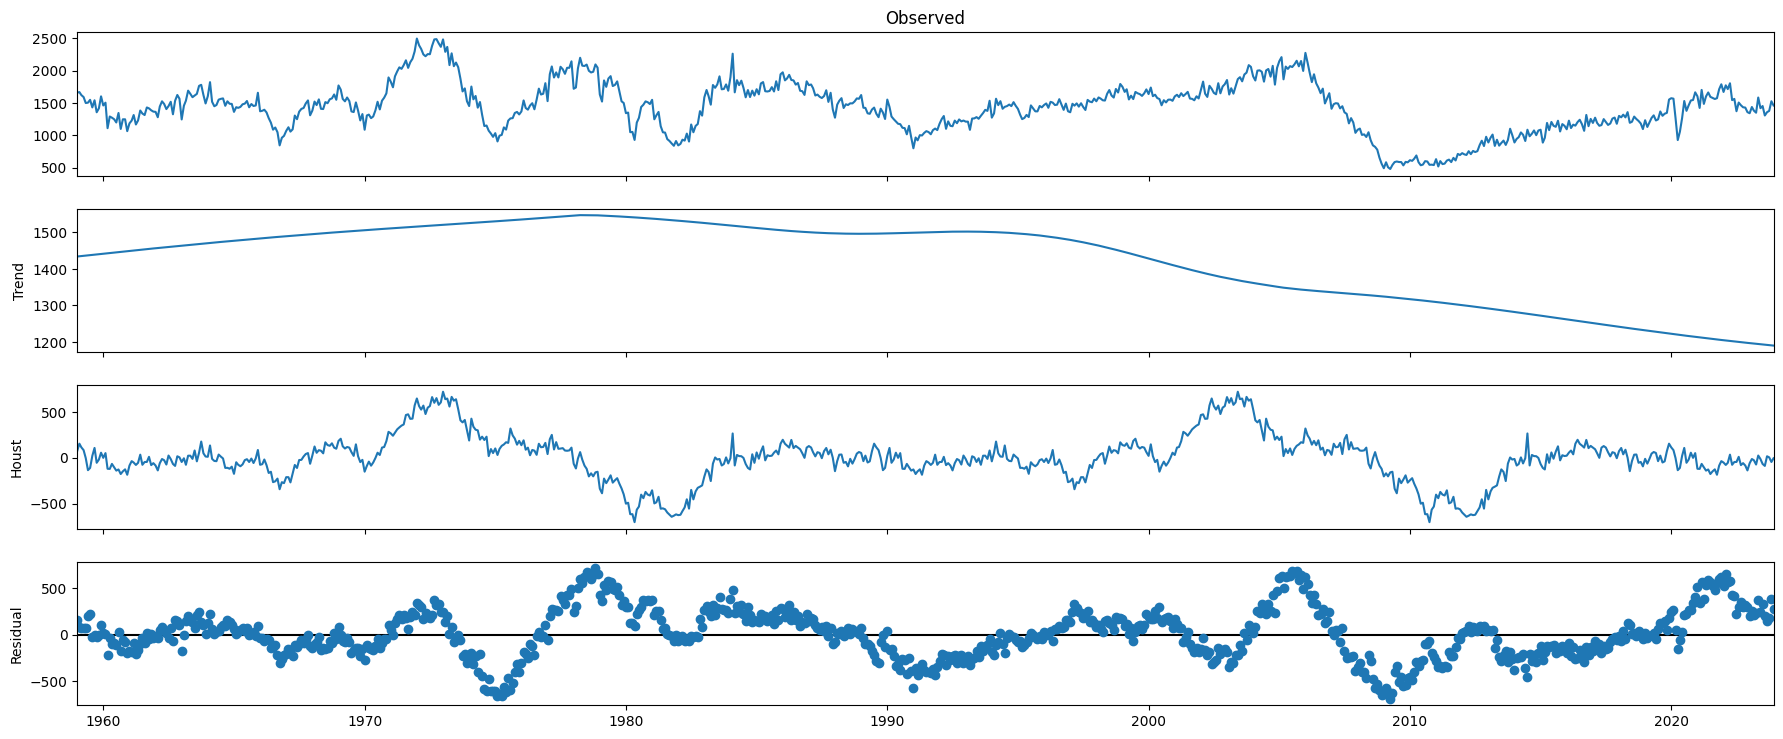

In [74]:
df_houst = merged_df[['date', 'HOUST']].copy()
df_houst = df_houst.set_index('date')
df_houst.head()

decomp = decompose(df_houst, period=365)
fig = decomp.plot()
fig.set_size_inches(20, 8)

In [75]:
import plotly.graph_objects as go

# Assuming you have a DataFrame named merged_df
# Example DataFrame
# merged_df = ...

# Replace 'Date' with 'date' and 'Close' with the desired column name (e.g., 'HOUST')
merged_df['EMA_9'] = merged_df['HOUST'].ewm(9).mean().shift()
merged_df['SMA_5'] = merged_df['HOUST'].rolling(5).mean().shift()
merged_df['SMA_10'] = merged_df['HOUST'].rolling(10).mean().shift()
merged_df['SMA_15'] = merged_df['HOUST'].rolling(15).mean().shift()
merged_df['SMA_30'] = merged_df['HOUST'].rolling(30).mean().shift()

fig = go.Figure()
fig.add_trace(go.Scatter(x=merged_df['date'], y=merged_df['EMA_9'], name='EMA 9'))
fig.add_trace(go.Scatter(x=merged_df['date'], y=merged_df['SMA_5'], name='SMA 5'))
fig.add_trace(go.Scatter(x=merged_df['date'], y=merged_df['SMA_10'], name='SMA 10'))
fig.add_trace(go.Scatter(x=merged_df['date'], y=merged_df['SMA_15'], name='SMA 15'))
fig.add_trace(go.Scatter(x=merged_df['date'], y=merged_df['SMA_30'], name='SMA 30'))
fig.add_trace(go.Scatter(x=merged_df['date'], y=merged_df['HOUST'], name='HOUST', opacity=0.2))
fig.show()


In [76]:
merged_df['HOUST'] = merged_df['HOUST'].shift(-1)

In [77]:
merged_df = merged_df[:-1]      # Because of shifting close price

merged_df.index = range(len(merged_df))

In [78]:
import plotly.graph_objects as go

# Assuming you have a DataFrame named merged_df
# Example DataFrame
# merged_df = ...

# Replace 'Date' with 'date' and 'Close' with the desired column name
test_size = 0.15
valid_size = 0.15

test_split_idx = int(merged_df.shape[0] * (1 - test_size))
valid_split_idx = int(merged_df.shape[0] * (1 - (valid_size + test_size)))

train_df = merged_df.loc[:valid_split_idx].copy()
valid_df = merged_df.loc[valid_split_idx + 1:test_split_idx].copy()
test_df = merged_df.loc[test_split_idx + 1:].copy()

fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df['date'], y=train_df['HOUST'], name='Training'))
fig.add_trace(go.Scatter(x=valid_df['date'], y=valid_df['HOUST'], name='Validation'))
fig.add_trace(go.Scatter(x=test_df['date'], y=test_df['HOUST'], name='Test'))
fig.show()


In [80]:
drop_cols = ['date']

train_df = train_df.drop(drop_cols, 1)
valid_df = valid_df.drop(drop_cols, 1)
test_df  = test_df.drop(drop_cols, 1)

C:\Users\uifan\AppData\Local\Temp\ipykernel_37188\3140501520.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



KeyError: "['date'] not found in axis"

In [81]:
# Replace 'Close' with 'HOUST'
y_train = train_df['HOUST'].copy()
X_train = train_df.drop(['HOUST'], 1)

y_valid = valid_df['HOUST'].copy()
X_valid = valid_df.drop(['HOUST'], 1)

y_test = test_df['HOUST'].copy()
X_test = test_df.drop(['HOUST'], 1)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EMA_9   545 non-null    float64
 1   SMA_5   541 non-null    float64
 2   SMA_10  536 non-null    float64
 3   SMA_15  531 non-null    float64
 4   SMA_30  516 non-null    float64
dtypes: float64(5)
memory usage: 21.5 KB


C:\Users\uifan\AppData\Local\Temp\ipykernel_37188\1902321272.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

C:\Users\uifan\AppData\Local\Temp\ipykernel_37188\1902321272.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

C:\Users\uifan\AppData\Local\Temp\ipykernel_37188\1902321272.py:9: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [82]:
parameters = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [8, 10, 12, 15],
    'gamma': [0.001, 0.005, 0.01, 0.02],
    'random_state': [42]
}

eval_set = [(X_train, y_train), (X_valid, y_valid)]
model = xgb.XGBRegressor(eval_set=eval_set, objective='reg:squarederror', verbose=False)
clf = GridSearchCV(model, parameters)

clf.fit(X_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

[00:03:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[00:03:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[00:03:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[00:03:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[00:03:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

In [83]:
model = xgb.XGBRegressor(**clf.best_params_, objective='reg:squarederror')
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.02, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

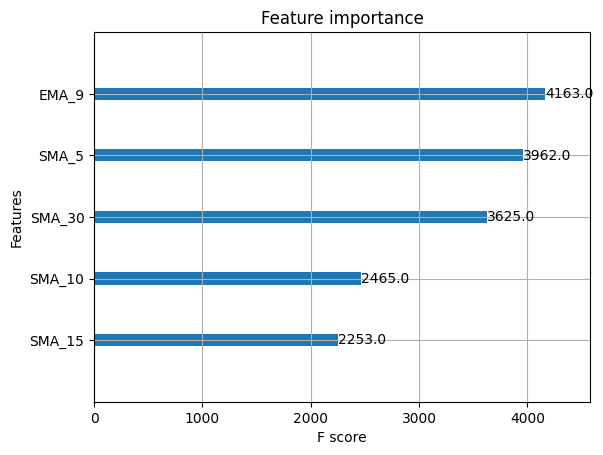

In [84]:
plot_importance(model);

In [100]:
y_pred = model.predict(X_test[:1])
print(f'y_true = {np.array(y_test)[:5]}')
print(f'y_pred = {y_pred[:5]}')

y_true = [1007.  911. 1085.  984. 1023.]
y_pred = [1055.6216]


In [125]:
y_pred

array([1055.6216], dtype=float32)

In [101]:
X_test[:1]

,EMA_9,SMA_5,SMA_10,SMA_15,SMA_30
663,901.055666,980.8,931.5,929.333333,845.333333


In [86]:
print(f'mean_squared_error = {mean_absolute_error(y_test, y_pred)}')


mean_squared_error = 96.65651729189116


In [87]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming you have a DataFrame named merged_df and y_pred
# Example DataFrame
# merged_df = ...
# y_pred = ...

# Replace 'df' with 'merged_df'
predicted_prices = merged_df.loc[test_split_idx + 1:].copy()
predicted_prices['HOUST'] = y_pred

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=merged_df['date'], y=merged_df['HOUST'],
                         name='Truth',
                         marker_color='LightSkyBlue'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices['date'],
                         y=predicted_prices['HOUST'],
                         name='Prediction',
                         marker_color='MediumPurple'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices['date'],
                         y=y_test,
                         name='Truth',
                         marker_color='LightSkyBlue',
                         showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=predicted_prices['date'],
                         y=y_pred,
                         name='Prediction',
                         marker_color='MediumPurple',
                         showlegend=False), row=2, col=1)

fig.show()


In [63]:
drop_cols = ['date']

training = merged_df.drop(drop_cols, 1)

C:\Users\uifan\AppData\Local\Temp\ipykernel_37188\1023673898.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [159]:
y_training = training['HOUST'].copy()
X_training = training.drop(['HOUST'], 1)

C:\Users\uifan\AppData\Local\Temp\ipykernel_37188\2311449464.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [154]:
model = xgb.XGBRegressor(**clf.best_params_, objective='reg:squarederror')
model.fit(X_training, y_training, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.02, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [155]:
y_training

0      1079.0
1      1103.0
2      1079.0
3      1176.0
4      1250.0
        ...  
382    1305.0
383    1356.0
384    1376.0
385    1525.0
386    1460.0
Name: HOUST, Length: 387, dtype: float64

In [160]:
import datetime
from dateutil.relativedelta import relativedelta

save_x = X_training.copy()
save_y = y_training.copy()

for i in range(12):
    # Copy the last row of X_training
    pred_data = save_x.tail(1).copy()

    # Update pred_data based on the latest y_training
    pred_data['EMA_9'] = save_y.ewm(9).mean().iloc[-1]
    pred_data['SMA_5'] = save_y.rolling(5).mean().iloc[-1]
    pred_data['SMA_10'] = save_y.rolling(10).mean().iloc[-1]
    pred_data['SMA_15'] = save_y.rolling(15).mean().iloc[-1]
    pred_data['SMA_30'] = save_y.rolling(30).mean().iloc[-1]

    # Print pred_data
    #print(y_training.ewm(9).mean().iloc[-1])


    # Make a prediction
    result = model.predict(pred_data)
    print(result)
    
    # Append the prediction to y_training
    series = pd.Series(result)
    save_y = save_y.append(series, ignore_index=True)
    

[1423.5215]
[1423.8895]
[1426.1233]
[1431.3015]
[1419.7921]
[1420.174]
[1426.4476]
[1434.8242]


C:\Users\uifan\AppData\Local\Temp\ipykernel_37188\3186923235.py:28: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[1434.8242]
[1434.8242]
[1434.8242]
[1434.4424]


In [162]:
date_range = pd.date_range(start='2024-01-01', end='2024-12-01', freq='MS')
df = pd.DataFrame({'date': date_range})
df['HOUST'] = save_y[-12:].values

In [163]:
df

,date,HOUST
0,2024-01-01,1423.521484
1,2024-02-01,1423.889526
2,2024-03-01,1426.123291
3,2024-04-01,1431.301514
4,2024-05-01,1419.792114
5,2024-06-01,1420.173950
6,2024-07-01,1426.447632
7,2024-08-01,1434.824219
8,2024-09-01,1434.824219
9,2024-10-01,1434.824219


In [171]:
plot_df = merged_df[(merged_df['date'] >= '2023-01-01') & (merged_df['date'] <= '2023-12-31')]

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=plot_df['date'], y=plot_df['HOUST'],
                         name='Truth',
                         marker_color='LightSkyBlue'), row=1, col=1)

fig.add_trace(go.Scatter(x=df['date'],
                         y=df['HOUST'],
                         name='Prediction',
                         marker_color='MediumPurple',
                         ), row=2, col=1)


In [175]:
from matplotlib import pyplot
from math import sqrt
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have a DataFrame named houst
# Example DataFrame
# houst = ...

history = [x for x in houst.HOUST]
predictions = list()

for t in range(12):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(yhat)

date_range = pd.date_range(start='2024-01-01', end='2024-12-01', freq='MS')
pred_df = pd.DataFrame({'date': date_range})
pred_df['HOUST'] = predictions

In [176]:
pred_df

,date,HOUST
0,2024-01-01,1465.378353
1,2024-02-01,1465.385130
2,2024-03-01,1465.383793
3,2024-04-01,1465.383886
4,2024-05-01,1465.383887
5,2024-06-01,1465.383887
6,2024-07-01,1465.383888
7,2024-08-01,1465.383888
8,2024-09-01,1465.383888
9,2024-10-01,1465.383888


In [185]:
import plotly.graph_objs as go

# Plotting the predicted data
fig = go.Figure()

# Line for df (MediumPurple)
fig.add_trace(go.Scatter(x=df['date'],
                         y=df['HOUST'],
                         name='Prediction (MediumPurple)',
                         line=dict(color='MediumPurple')))

# Line for pred_df (Green)
fig.add_trace(go.Scatter(x=pred_df['date'],
                         y=pred_df['HOUST'],
                         name='Prediction (Green)',
                         line=dict(color='Green')))

# Update layout for better visualization
fig.update_layout(title_text="Predicted Housing Prices",
                  xaxis=dict(title="Date"),
                  yaxis=dict(title="Housing Prices"))

# Show the plot
fig.show()


In [188]:
import plotly.graph_objs as go

# Plotting the predicted data
fig = go.Figure()

# Line for df (MediumPurple)
fig.add_trace(go.Scatter(x=df['date'],
                         y=df['HOUST'],
                         name='Prediction (MediumPurple)',
                         line=dict(color='MediumPurple')))

# Line for pred_df (Green)
fig.add_trace(go.Scatter(x=pred_df['date'],
                         y=pred_df['HOUST'],
                         name='Prediction (Green)',
                         line=dict(color='Green')))

# Update layout for better visualization
fig.update_layout(title_text="Predicted Housing Prices",
                  xaxis=dict(title="Date"),
                  yaxis=dict(title="Housing Prices"))

# Show the plot
fig.show()


In [189]:
df.to_csv('xgboost.csv')
pred_df.to_csv("arima.csv")

In [191]:
mortgage_df.to_csv("mortgage.csv")